In [22]:
# Libaries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.tree import DecisionTreeClassifier

# 1. Read dataset

In [2]:
df = pd.read_csv(r"C:\Users\ljant\Desktop\Ironhack\16_Machine_learning_advanced\lab-cross-validation\files_for_lab\Customer-Churn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


# 2. Cleaning the data

Columns names

In [3]:
def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


Duplicates

In [4]:
df.drop_duplicates()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


Numeric and categorical columns

In [5]:
data_types = df.dtypes
print (data_types)

def column_types (data):
    num_col = df.select_dtypes(include=['int', 'float', 'datetime64']).columns
    cat_col = df.select_dtypes(include=['object']).columns
    return num_col, cat_col

df_num = df.select_dtypes('number')
df_cat = df.select_dtypes('object')

gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object


Dealing with '-' in totalcharges

In [6]:
df['totalcharges'] = pd.to_numeric(df['totalcharges'].replace(' ', pd.NA))
df.select_dtypes('number')

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


NaN-Values

In [7]:
sum_na = df.isna().sum()
print (sum_na)

# Check for percentages in big df:
sum_na = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
sum_na.columns = ['column_name', 'nans_percentage']
sum_na.sort_values(by = ['nans_percentage'], ascending = False)

gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64


,column_name,nans_percentage
14,totalcharges,0.001562
0,gender,0.000000
1,seniorcitizen,0.000000
2,partner,0.000000
3,dependents,0.000000
4,tenure,0.000000
5,phoneservice,0.000000
6,onlinesecurity,0.000000
7,onlinebackup,0.000000
8,deviceprotection,0.000000


In [8]:
# Dropping the NaNs
df = df.dropna()

Preparing the target value

In [9]:
df['churn'] = df['churn'].replace({'Yes': 1, 'No': 0})

One-hot coding the categorcial columns

In [10]:
df_cat = df.select_dtypes('object').reset_index(drop = True)
df_cat = pd.get_dummies(df_cat, dtype = int)
def header_function (data):
    cols = []
    for i in range (len(data.columns)):
        cols.append(data.columns[i].lower().replace(' ','_'))
    
    data.columns = cols

    return data

header_function(df_cat)

,gender_female,gender_male,partner_no,partner_yes,dependents_no,dependents_yes,phoneservice_no,phoneservice_yes,onlinesecurity_no,onlinesecurity_no_internet_service,...,techsupport_yes,streamingtv_no,streamingtv_no_internet_service,streamingtv_yes,streamingmovies_no,streamingmovies_no_internet_service,streamingmovies_yes,contract_month-to-month,contract_one_year,contract_two_year
0,1,0,0,1,1,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,1,1,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
3,0,1,1,0,1,0,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,1,0,1,0,1,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
7028,1,0,0,1,0,1,0,1,1,0,...,0,0,0,1,0,0,1,0,1,0
7029,1,0,0,1,0,1,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
7030,0,1,0,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0


Concatting the dfs back together

In [11]:
df_num = df.select_dtypes('number').reset_index(drop = True)

In [12]:
df_adj = pd.concat([df_num, df_cat], axis = 1).reset_index(drop = True)
df_adj

# Double check data types
data_types = df_adj.dtypes
print (data_types)

seniorcitizen                             int64
tenure                                    int64
monthlycharges                          float64
totalcharges                            float64
churn                                     int64
gender_female                             int32
gender_male                               int32
partner_no                                int32
partner_yes                               int32
dependents_no                             int32
dependents_yes                            int32
phoneservice_no                           int32
phoneservice_yes                          int32
onlinesecurity_no                         int32
onlinesecurity_no_internet_service        int32
onlinesecurity_yes                        int32
onlinebackup_no                           int32
onlinebackup_no_internet_service          int32
onlinebackup_yes                          int32
deviceprotection_no                       int32
deviceprotection_no_internet_service    

In [13]:
df_adj['churn'].value_counts()
# Slightly imbalanced data!

0    5163
1    1869
Name: churn, dtype: int64

# 3. SMOTE-adjust to data

- Train-Test-Split

In [14]:
X = df_adj.drop(['churn'], axis = 1)
Y = df_adj['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
sm = SMOTE(random_state = 0, sampling_strategy = 1.0)
X_train_SMOTE, Y_train_SMOTE = sm.fit_resample(X_train, Y_train)

In [16]:
Y_train_SMOTE.value_counts()

1    4130
0    4130
Name: churn, dtype: int64

# 3.1 Logistic Model

In [17]:
model_lm = LogisticRegression()
model_lm.fit(X_train_SMOTE, Y_train_SMOTE)
result = model_lm.score(X_train_SMOTE, Y_train_SMOTE)
print("The accuracy of the model is = ", round(result,3))

# Accuracy of the model is 82,8 %

The accuracy of the model is =  0.828


# 3.2 Decision Tree

In [25]:
max_depth = range(1,20)
test = []
train = []
for depth in max_depth:
    model = DecisionTreeClassifier(max_depth= depth)
    model.fit(X_train, Y_train)
    test.append(model.score(X_test,Y_test))
    train.append(model.score(X_train,Y_train))

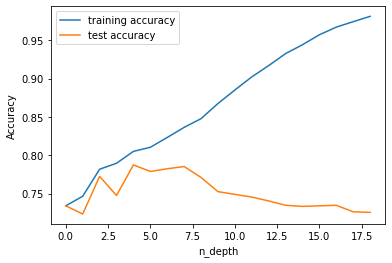

In [26]:
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

In [27]:
model_dt = DecisionTreeClassifier(max_depth = 4)
model_dt.fit (X_train_SMOTE, Y_train_SMOTE)
result = model_dt.score(X_train_SMOTE, Y_train_SMOTE)
print("The accuracy of the model is = ", round(result,3))

# Accuracy of the model is 81,9 % --> slightly lower then in the logistic model

The accuracy of the model is =  0.819


# 4. TomekLink-adjust to data

In [31]:
X = df_adj.drop(['churn'], axis = 1)
Y = df_adj['churn']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
tl = TomekLinks()
X_train_TL, Y_train_TL = tl.fit_resample(X_train, Y_train)

In [35]:
Y_train_TL.value_counts()

0    3682
1    1495
Name: churn, dtype: int64

# 4.1 Logistic Model

In [36]:
model_lm = LogisticRegression()
model_lm.fit(X_train_TL, Y_train_TL)
result = model_lm.score(X_train_TL, Y_train_TL)
print("The accuracy of the model is = ", round(result,3))

# Accuracy of the model is 81,4 %

The accuracy of the model is =  0.814


# 4.2 Decision Tree

In [37]:
model_dt = DecisionTreeClassifier(max_depth = 4)
model_dt.fit (X_train_TL, Y_train_TL)
result = model_dt.score(X_train_TL, Y_train_TL)
print("The accuracy of the model is = ", round(result,3))

# Accuracy of the model is 80,6 % --> slightly lower then in the logistic model

The accuracy of the model is =  0.806


# Summary

In [ ]:
'''
Comparing the Logistic Regression model and the Decision Tree moodel, in both data adjusment methods (SMOTE and TomekLink)
the Logistic Regression model performed slightly better than the Decision Tree model. Between the two adjustment methods,
SMOTE had a better overall accuracy than TomekLink. However, only accuarcy was assessed and no other elvaluation variable.

'''